In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X) , len(y)

(50, 50)

In [ ]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels , c='b',s=4,label = 'Training data')
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  plt.legend(prop={'size':14})


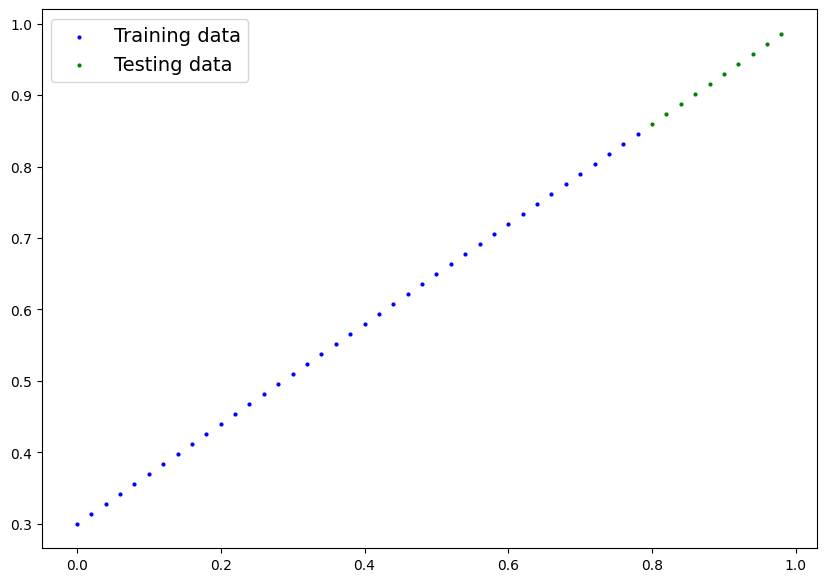

In [ ]:
plot_predictions()

In [ ]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():# the use of inference here is to turn of grad, using this we can make workflow efficient.
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

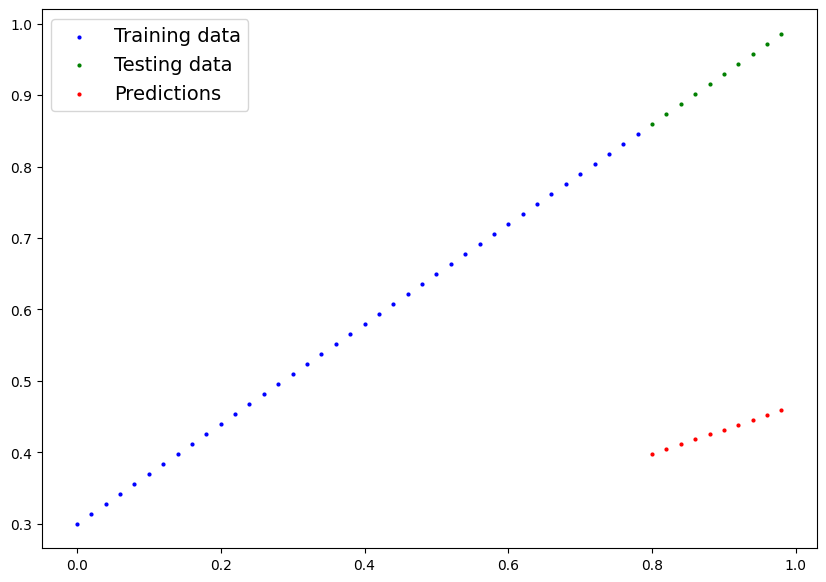

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [ ]:
loss = nn.L1Loss()
optimizer =   torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

In [ ]:
torch.manual_seed(42)
epochs = 200
epochs_list = []
loss_list = []
test_loss_list = []
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)#forward pass
  loss_fn = loss(y_pred,y_train)
  print(f"loss:", loss_fn)
  optimizer.zero_grad()
  loss_fn.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss(test_pred,y_test)
  if epoch % 10 == 0:
    epochs_list.append(epoch)
    loss_list.append(loss_fn)
    test_loss_list.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss_fn} | Test loss: {test_loss}")
    print(model_0.state_dict())

loss: tensor(0.3129, grad_fn=<MeanBackward0>)
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: tensor(0.3014, grad_fn=<MeanBackward0>)
loss: tensor(0.2898, grad_fn=<MeanBackward0>)
loss: tensor(0.2783, grad_fn=<MeanBackward0>)
loss: tensor(0.2668, grad_fn=<MeanBackward0>)
loss: tensor(0.2553, grad_fn=<MeanBackward0>)
loss: tensor(0.2438, grad_fn=<MeanBackward0>)
loss: tensor(0.2322, grad_fn=<MeanBackward0>)
loss: tensor(0.2207, grad_fn=<MeanBackward0>)
loss: tensor(0.2092, grad_fn=<MeanBackward0>)
loss: tensor(0.1977, grad_fn=<MeanBackward0>)
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss: tensor(0.1862, grad_fn=<MeanBackward0>)
loss: tensor(0.1746, grad_fn=<MeanBackward0>)
loss: tensor(0.1631, grad_fn=<MeanBackward0>)
loss: tensor(0.1516, grad_fn=<MeanBackward0>)
loss: tensor(0.1401, grad

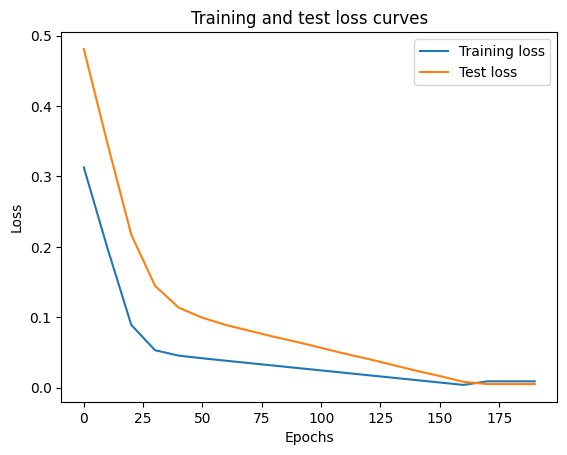

In [ ]:
import numpy as np
plt.plot(epochs_list,np.array(torch.tensor(loss_list).numpy()),label='Training loss')
plt.plot(epochs_list,test_loss_list,label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

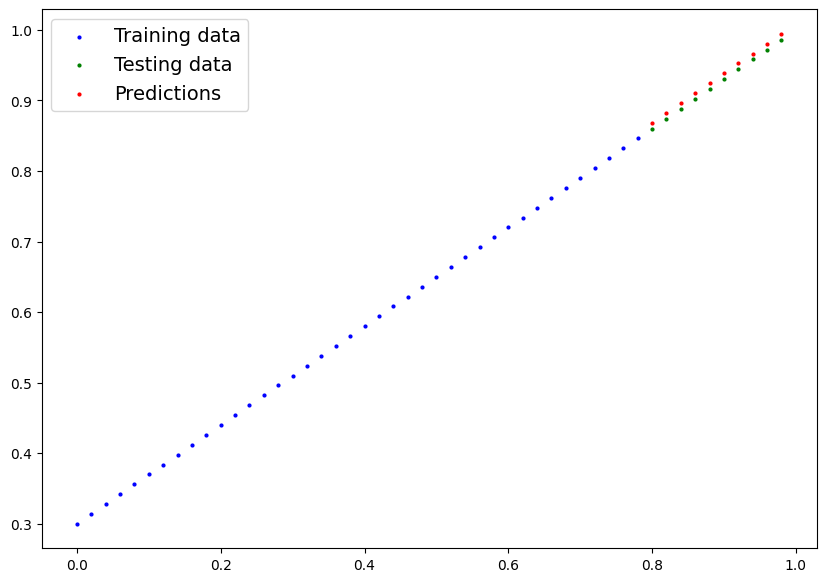

In [ ]:
plot_predictions(predictions = test_pred)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj = model_0.state_dict(),f = MODEL_SAVE_PATH)

In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-119-f8c095e93af7>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])